<a href="https://colab.research.google.com/github/shubhaankargupta/nn_estimator/blob/main/equation_estimator_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credits: https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

In [68]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(5)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)



#instead of i*i, write any equation that you want
y_values = [i*i for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [69]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [70]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 5000

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [71]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [72]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

Streaming output truncated to the last 5000 lines.
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2500, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2501, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2502, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2503, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2504, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2505, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2506, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2507, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2508, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2509, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2510, loss 2.799999952316284
tensor(2.8000, grad_fn=<MseLossBackward>)
epoch 2511, loss 2.799999952316284
tensor(2.8000, grad_fn=<M

[[-1.9999855]
 [ 2.0000088]
 [ 6.000003 ]
 [ 9.999997 ]
 [13.999991 ]]


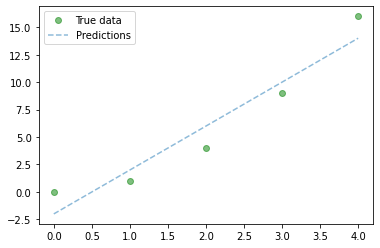

In [73]:
import matplotlib.pyplot as plt

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()